In [1]:
import torch.nn as nn
from torch.optim import SGD, Adam
from helper import load_fashion_mnist_data, predict_fashion_mnist
from helper import evaluate_accuracy, evaluate_loss

from LeNet import LeNet
from LeNet import C1, C3_simplified, C5
from LeNet import S2_avgPooling, S2_maxPooling, S4_avgPooling, S4_maxPooling
from LeNet import F6, RBF
from LeNet import Reshape, Flatten

%load_ext autoreload
%autoreload 2

In [2]:
# Input size: 28 (width) * 28 (height) = 784 pixels
num_inputs = 784

# Output size: 10 categories
num_outputs = 10

batch_size = 256
mnist_train, mnist_test = load_fashion_mnist_data(batch_size, resize=None)

In [3]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)


In [4]:
LeNet_5_maxPooling = LeNet(
    Reshape(),
    C1,
    nn.Sigmoid(),
    S2_maxPooling,
    C3_simplified,
    nn.Sigmoid(),
    S4_maxPooling,
    nn.Flatten(),
    C5,
    nn.Sigmoid(),
    F6,
    nn.Sigmoid(),
    RBF,
    verbose=True
)
LeNet_5_maxPooling.initialize(learning_rate=0.9)
LeNet_5_maxPooling.apply(init_weights)
LeNet_5_maxPooling.train(mode=True, data=mnist_train, epochs=5)

[epoch 1, batch 46] loss: 2.3608002869979194
[epoch 1, batch 92] loss: 2.3119760129762734
[epoch 1, batch 138] loss: 2.3088355271712593
[epoch 1, batch 184] loss: 2.3053678015004033
[epoch 1, batch 230] loss: 2.3041370433309805
[epoch 2, batch 46] loss: 2.553833842277527
[epoch 2, batch 92] loss: 2.296604291252468
[epoch 2, batch 138] loss: 2.2034988273744998
[epoch 2, batch 184] loss: 1.5723868219748787
[epoch 2, batch 230] loss: 1.2475365115248638
[epoch 3, batch 46] loss: 1.164449472790179
[epoch 3, batch 92] loss: 0.9546726203483084
[epoch 3, batch 138] loss: 0.8870437482128972
[epoch 3, batch 184] loss: 0.8370785078276759
[epoch 3, batch 230] loss: 0.7636884684148042
[epoch 4, batch 46] loss: 0.8123055411421735
[epoch 4, batch 92] loss: 0.7174360246761985
[epoch 4, batch 138] loss: 0.6799656774686731
[epoch 4, batch 184] loss: 0.6935830232889756
[epoch 4, batch 230] loss: 0.6501388096291086
[epoch 5, batch 46] loss: 0.7101251664369003
[epoch 5, batch 92] loss: 0.6081729226786158
[

LeNet(
  (0): Reshape()
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): Sigmoid()
  (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): Sigmoid()
  (6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Flatten()
  (8): Linear(in_features=400, out_features=120, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=120, out_features=84, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=84, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)

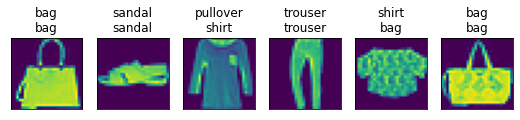

In [5]:
predict_fashion_mnist(LeNet_5_maxPooling, mnist_test)

In [7]:
training_loss = evaluate_loss(LeNet_5_maxPooling, mnist_train)
validation_loss = evaluate_loss(LeNet_5_maxPooling, mnist_test)

print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Training Loss (60000 samples): 
0.7050158064524332
Validation Loss (10000 samples): 
0.7327483804702759


In [8]:
training_accuracy = evaluate_accuracy(LeNet_5_maxPooling, mnist_train)
validation_accuracy = evaluate_accuracy(LeNet_5_maxPooling, mnist_test)

print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Training accuracy (60000 samples): 
0.7206833333333333
Validation accuracy (10000 samples): 
0.7085


In [9]:
LeNet_5_avgPooling = LeNet(
    C1,
    nn.Sigmoid(),
    S2_avgPooling,
    C3_simplified,
    nn.Sigmoid(),
    S4_avgPooling,
    nn.Flatten(),
    C5,
    nn.Sigmoid(),
    F6,
    nn.Sigmoid(),
    RBF
)
LeNet_5_maxPooling.initialize(learning_rate=0.9)
LeNet_5_maxPooling.apply(init_weights)
LeNet_5_maxPooling.train(mode=True, data=mnist_train, epochs=5)

[epoch 1, batch 46] loss: 2.374825145887292
[epoch 1, batch 92] loss: 2.31441535120425
[epoch 1, batch 138] loss: 2.30882742093957
[epoch 1, batch 184] loss: 2.3042722681294316
[epoch 1, batch 230] loss: 2.283619699270829
[epoch 2, batch 46] loss: 2.1960165396980615
[epoch 2, batch 92] loss: 1.3675508576890696
[epoch 2, batch 138] loss: 1.118488998516746
[epoch 2, batch 184] loss: 1.0215733530728712
[epoch 2, batch 230] loss: 1.0168776382570681
[epoch 3, batch 46] loss: 0.9899463368498761
[epoch 3, batch 92] loss: 0.8499916040379069
[epoch 3, batch 138] loss: 0.7858126124610072
[epoch 3, batch 184] loss: 0.7662696980911753
[epoch 3, batch 230] loss: 0.7168898763863937
[epoch 4, batch 46] loss: 0.7598241917465044
[epoch 4, batch 92] loss: 0.6848962656829668
[epoch 4, batch 138] loss: 0.6517739257086879
[epoch 4, batch 184] loss: 0.6549210820509039
[epoch 4, batch 230] loss: 0.6341343820095062
[epoch 5, batch 46] loss: 0.6711284479369288
[epoch 5, batch 92] loss: 0.6088845243920451
[epoc

LeNet(
  (0): Reshape()
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): Sigmoid()
  (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): Sigmoid()
  (6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Flatten()
  (8): Linear(in_features=400, out_features=120, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=120, out_features=84, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=84, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)

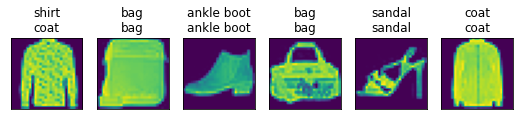

In [10]:
predict_fashion_mnist(LeNet_5_maxPooling, mnist_test)

In [11]:
training_loss = evaluate_loss(LeNet_5_maxPooling, mnist_train)
validation_loss = evaluate_loss(LeNet_5_maxPooling, mnist_test)

print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Training Loss (60000 samples): 
0.5746140871683757
Validation Loss (10000 samples): 
0.5991876667022705


In [12]:
training_accuracy = evaluate_accuracy(LeNet_5_maxPooling, mnist_train)
validation_accuracy = evaluate_accuracy(LeNet_5_maxPooling, mnist_test)

print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Training accuracy (60000 samples): 
0.7832
Validation accuracy (10000 samples): 
0.7735
